In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
customer_churn_dataset = pd.read_csv("CustomerChurn.csv")

In [3]:
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# we can change all the yes and no to 1 and zeros
# but first lets look at multiple lines 

In [5]:
customer_churn_dataset['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object

In [6]:
customer_churn_dataset['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [9]:
MultipleLines_dummy_variable = pd.get_dummies(data=customer_churn_dataset['MultipleLines'])
MultipleLines_dummy_variable

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [10]:
# lets add the No phone service coulmn to our data set

In [11]:
customer_churn_dataset['No phone service'] = MultipleLines_dummy_variable['No phone service'] 

In [12]:
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [13]:
# now we can replace the multiple lines column with the yes column

In [14]:
customer_churn_dataset['MultipleLines'] = MultipleLines_dummy_variable['Yes']

In [15]:
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service
0,7590-VHVEG,Female,0,Yes,No,1,No,0,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,0,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [16]:
# we can also make the gender gategory binary

In [17]:
sex = pd.get_dummies(data=customer_churn_dataset['gender'])
sex

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [18]:
# we can now replace the gender column with either the male or female column

In [19]:
customer_churn_dataset['gender'] = sex['Male']

In [20]:
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service
0,7590-VHVEG,0,0,Yes,No,1,No,0,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,1,0,No,No,34,Yes,0,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,1,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,1,0,No,No,45,No,0,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,0,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [21]:
# we can now replace every no with a 0 and yes with a 1

In [23]:
customer_churn_dataset.replace('Yes', 1, inplace=True)
customer_churn_dataset.replace('No', 0, inplace=True)
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [24]:
# lets take a look at the internet service column

In [25]:
customer_churn_dataset['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [26]:
# how many different options are there for the internetservice column

In [27]:
customer_churn_dataset['InternetService'].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [30]:
# replace the 0 if Niether

In [31]:
customer_churn_dataset['InternetService'].replace(0, 'Niether', inplace=True)

In [32]:
customer_churn_dataset['InternetService'].unique()

array(['DSL', 'Fiber optic', 'Niether'], dtype=object)

In [33]:
# run dummy variables

In [51]:
Type_of_Internet_service = pd.get_dummies(customer_churn_dataset['InternetService'])
Type_of_Internet_service

,DSL,Fiber optic,Niether
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,0,0,0
7039,0,0,0
7040,0,0,0
7041,0,0,0


In [52]:
# is it worth keeping niether

In [53]:
customer_churn_dataset['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Niether        1526
Name: InternetService, dtype: int64

In [38]:
# yes its about a 5th of the data

<AxesSubplot:xlabel='InternetService', ylabel='count'>

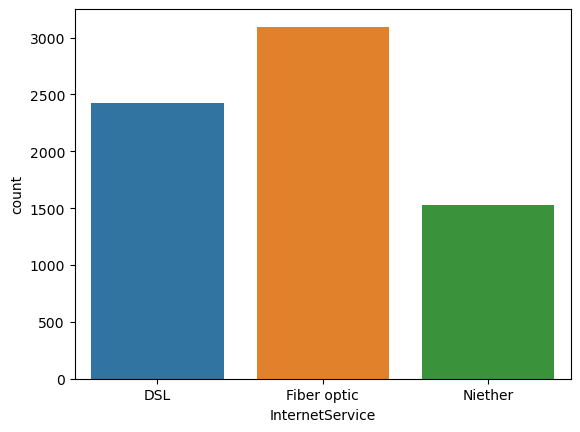

In [54]:
sns.countplot(x=customer_churn_dataset['InternetService'])

In [44]:
#we can append Type_of_Internet_service to the dataset

In [114]:
customer_churn_dataset_1 =pd.get_dummies(customer_churn_dataset, columns=['InternetService'], drop_first=True)

In [115]:
customer_churn_dataset_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,InternetService_Fiber optic,InternetService_Niether
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,...,0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,1.0,0,0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1,0,1,...,0,One year,0.0,Mailed check,56.95,1889.5,0.0,0.0,0,0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,1,0,...,0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,0.0,0,0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1,0,1,...,0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,1.0,0,0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0,...,0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,0.0,1,0


In [ ]:
# drop customer Id

In [76]:
customer_churn_dataset.drop(labels='customerID', axis=1, inplace=True)

In [77]:
customer_churn_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,DSL,Fiber optic,Niether
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,DSL,0,1,...,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,1.0,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,DSL,1,0,...,One year,0.0,Mailed check,56.95,1889.5,0.0,0.0,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,DSL,1,1,...,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,0.0,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,DSL,1,0,...,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,1.0,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,Fiber optic,0,0,...,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,0.0,NaN,NaN,NaN


In [78]:
customer_churn_dataset['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038               NaN
7039               NaN
7040               NaN
7041               NaN
7042               NaN
Name: Contract, Length: 112688, dtype: object

In [103]:
customer_churn_dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:>

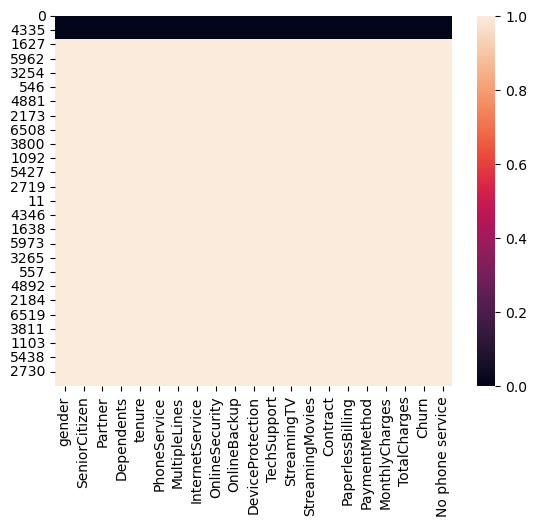

In [93]:
sns.heatmap(customer_churn_dataset.isnull())

In [99]:
customer_churn_dataset.dropna(inplace=True)

<AxesSubplot:>

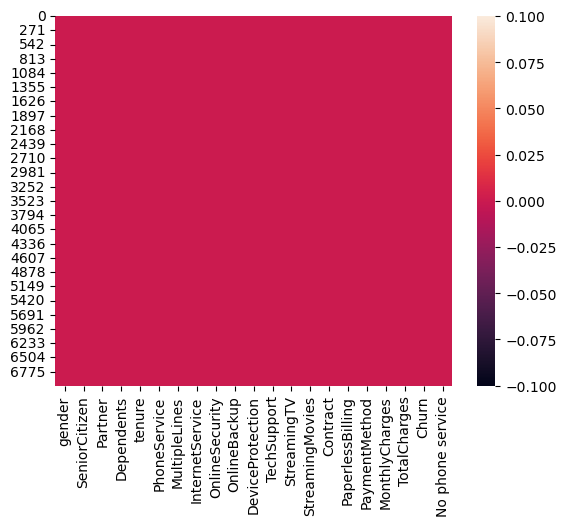

In [101]:
sns.heatmap(customer_churn_dataset.isnull())

In [102]:
customer_churn_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,DSL,0,1,...,0,0,0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,1.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,DSL,1,0,...,0,0,0,One year,0.0,Mailed check,56.95,1889.5,0.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,DSL,1,1,...,0,0,0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,0.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,DSL,1,0,...,1,0,0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,1.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,Fiber optic,0,0,...,0,0,0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,0.0


<AxesSubplot:xlabel='Contract', ylabel='count'>

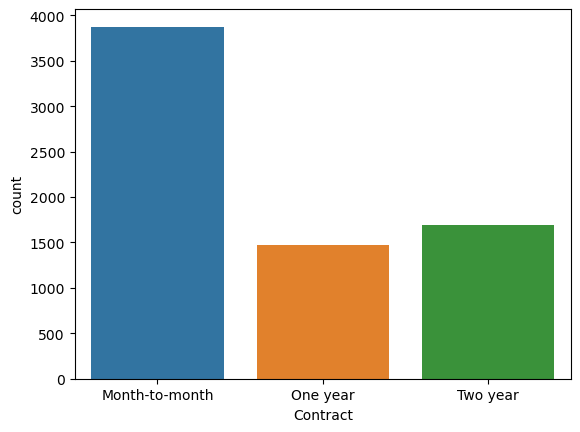

In [112]:
sns.countplot(x=customer_churn_dataset['Contract'])

In [125]:
customer_churn_dataset_2 =pd.get_dummies(customer_churn_dataset_1, columns=['Contract'], drop_first=True)

In [126]:
customer_churn_dataset_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,InternetService_Fiber optic,InternetService_Niether,Contract_One year,Contract_Two year
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,...,1.0,Electronic check,29.85,29.85,0.0,1.0,0,0,0,0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1,0,1,...,0.0,Mailed check,56.95,1889.5,0.0,0.0,0,0,1,0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,1,0,...,1.0,Mailed check,53.85,108.15,1.0,0.0,0,0,0,0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1,0,1,...,0.0,Bank transfer (automatic),42.30,1840.75,0.0,1.0,0,0,1,0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0,...,1.0,Electronic check,70.70,151.65,1.0,0.0,1,0,0,0


In [117]:
customer_churn_dataset['PaymentMethod']

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [118]:
customer_churn_dataset['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [119]:
customer_churn_dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

C:\Users\Papak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

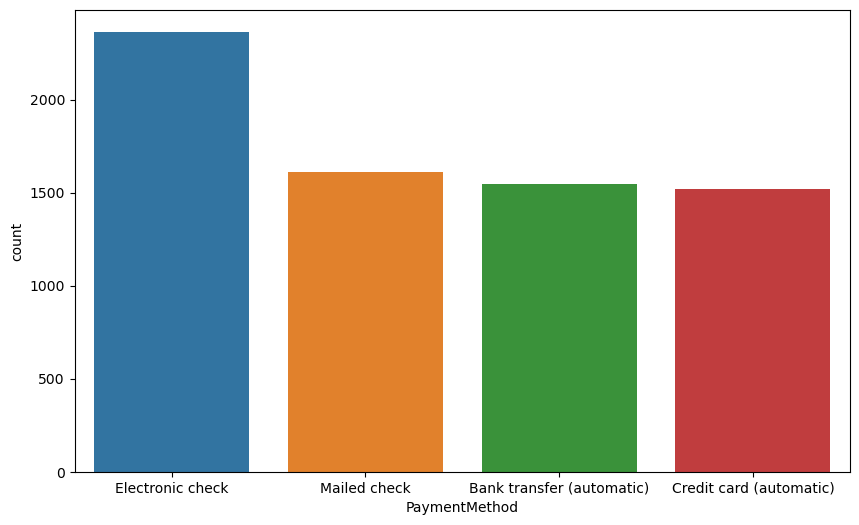

In [123]:
plt.figure(figsize=(10, 6))
sns.countplot(customer_churn_dataset['PaymentMethod'])

In [128]:
customer_churn_dataset_3 = pd.get_dummies(customer_churn_dataset_2, columns=['PaymentMethod'], drop_first=True)

In [129]:
customer_churn_dataset_3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,No phone service,InternetService_Fiber optic,InternetService_Niether,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,...,29.85,0.0,1.0,0,0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1,0,1,...,1889.5,0.0,0.0,0,0,1,0,0,0,1
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,1,0,...,108.15,1.0,0.0,0,0,0,0,0,0,1
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1,0,1,...,1840.75,0.0,1.0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0,...,151.65,1.0,0.0,1,0,0,0,0,1,0


In [130]:
customer_churn_dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   float64
 1   SeniorCitizen                          7043 non-null   float64
 2   Partner                                7043 non-null   float64
 3   Dependents                             7043 non-null   float64
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   float64
 6   MultipleLines                          7043 non-null   float64
 7   OnlineSecurity                         7043 non-null   object 
 8   OnlineBackup                           7043 non-null   object 
 9   DeviceProtection                       7043 non-null   object 
 10  TechSupport                            7043 non-null   object 
 11  Stre

In [131]:
customer_churn_dataset_3.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,No phone service,InternetService_Fiber optic,InternetService_Niether,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,0.265370,0.096834,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,0.441561,0.295752,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
customer_churn_dataset_3.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,No phone service,InternetService_Fiber optic,InternetService_Niether,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.011754,-0.014569,-0.008612,0.006488,-0.011286,0.006026,0.008026,-0.003695,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.156530,0.220173,0.150889,-0.008576,0.255338,-0.182742,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.014877,0.096848,-0.150448,-0.017706,0.000304,0.000615,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.111377,-0.113890,-0.164221,0.001762,-0.165818,0.139812,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.006152,0.247900,-0.352229,-0.008448,0.019720,-0.039062,0.202570,0.558533,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.016505,0.247398,0.011942,-1.000000,0.289999,0.172209,-0.002791,0.003519,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.163530,0.490434,0.040102,-0.279690,0.366083,-0.210564,-0.003794,0.106253,0.060048,0.083618,-0.227206
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.163530,1.000000,0.352150,0.191825,-0.016505,0.326853,-0.321013,-0.051391,-0.147889,-0.013589,0.208865,-0.205398
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490434,0.352150,1.000000,0.193356,-0.247398,0.787066,-0.763557,0.004904,-0.074681,0.030550,0.271625,-0.377437
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,1.000000,-0.011942,0.308020,-0.227890,-0.177820,-0.302253,-0.134302,0.301919,-0.091683


In [136]:
customer_churn_dataset_3['Churn'].corr(customer_churn_dataset_3['InternetService_Fiber optic'])

0.30801974494482237

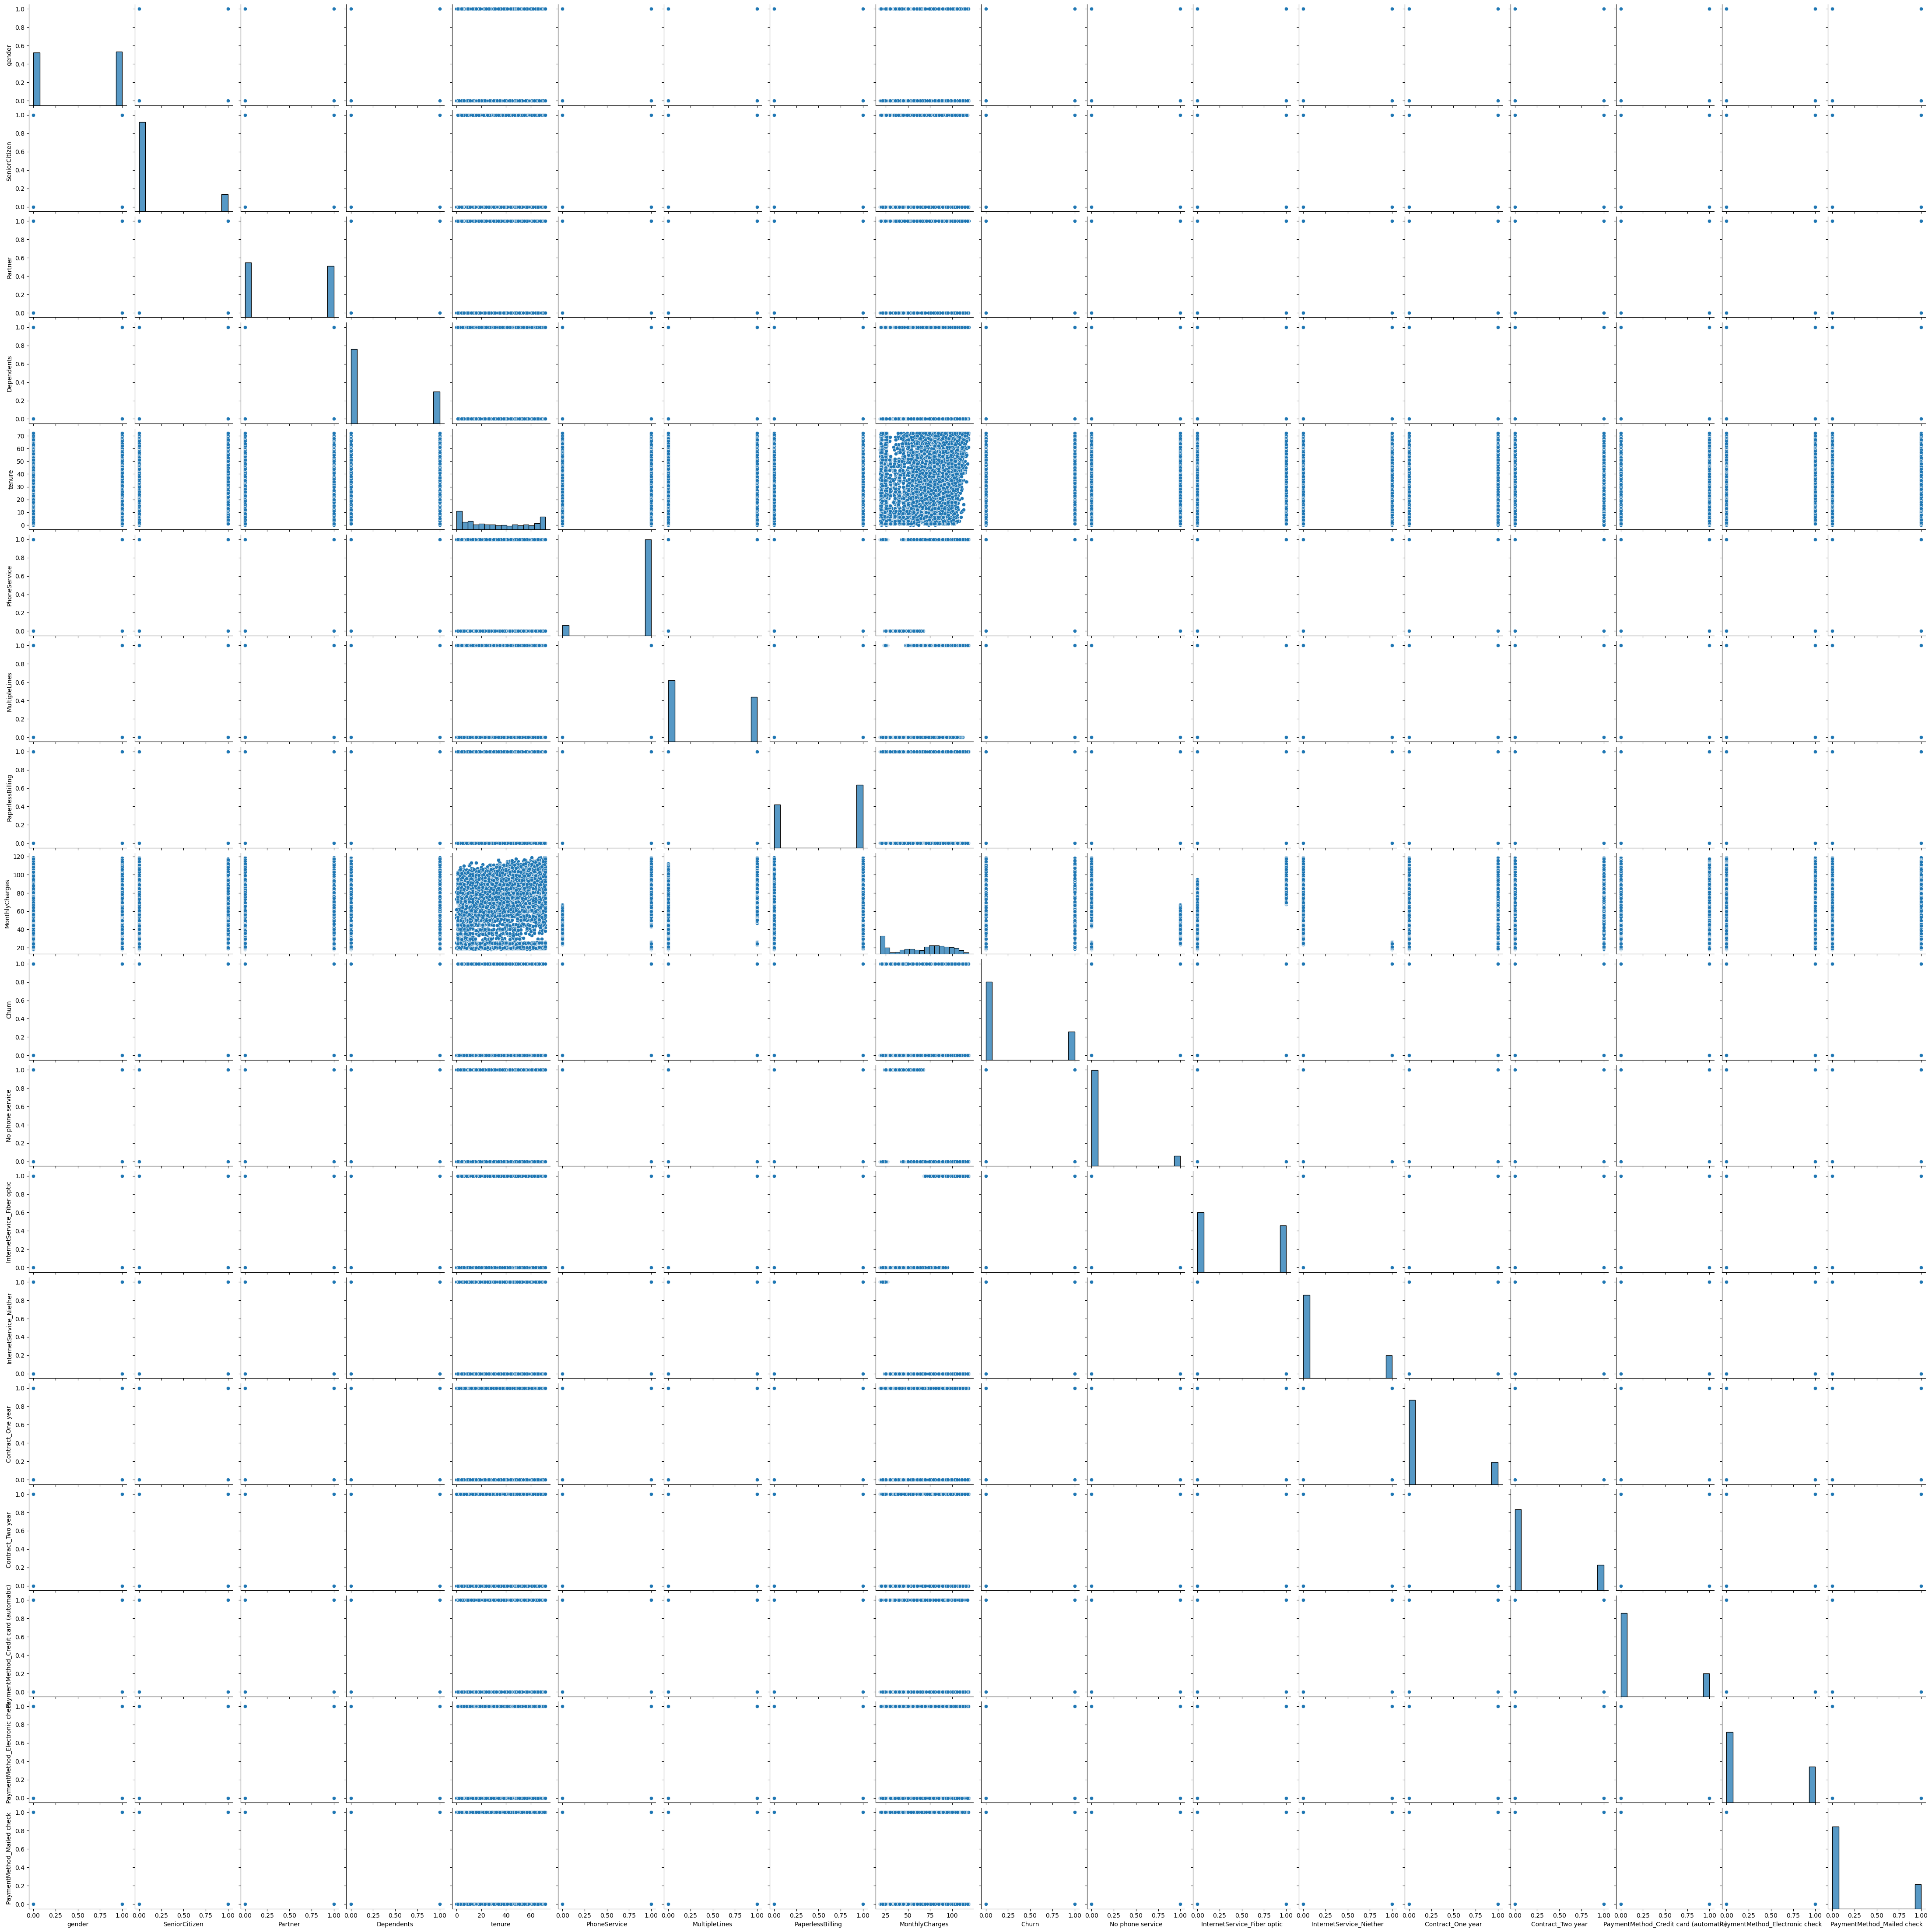

In [138]:
sns.pairplot(customer_churn_dataset_3)

In [139]:
# doesnt give much information because mostly binary numbers

In [140]:
customer_churn_dataset_3['Churn'].corr(customer_churn_dataset_3['tenure'])

-0.3522286701130777

<AxesSubplot:>

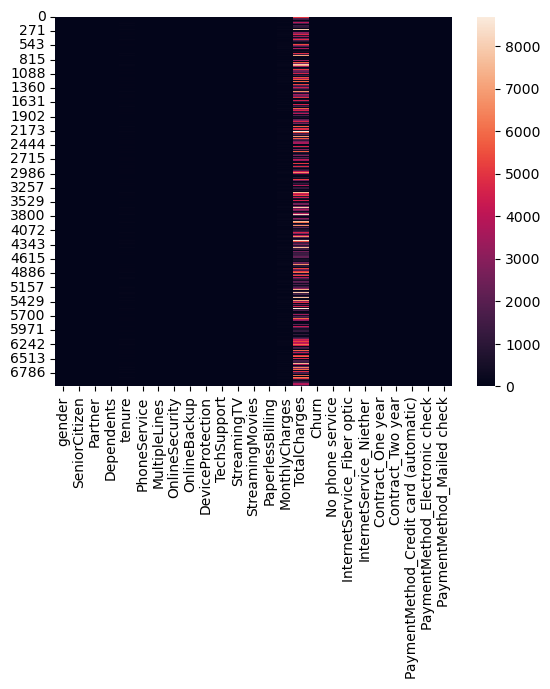

In [293]:
sns.heatmap(customer_churn_dataset_4)

In [ ]:
# tind rows that have the string no internet service

In [153]:
x = customer_churn_dataset_3.columns

for i in x:
    print(customer_churn_dataset_3[customer_churn_dataset_3[i].astype(str).str.contains('No internet service')])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, No phone service, InternetService_Fiber optic, InternetService_Niether, Contract_One year, Contract_Two year, PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 25 columns]
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, No phone service, InternetService_Fiber optic, InternetService_Niether, Contract_One year, Contract_Two year, PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 25 columns]
Empty Data

In [ ]:
# onlinesecurity, onlinebackup, deviceprotetion

In [155]:
customer_churn_dataset_3['OnlineSecurity'].unique()

array([0, 1, 'No internet service'], dtype=object)

In [160]:
customer_churn_dataset_3['OnlineSecurity'].value_counts()

0                      3498
1                      2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

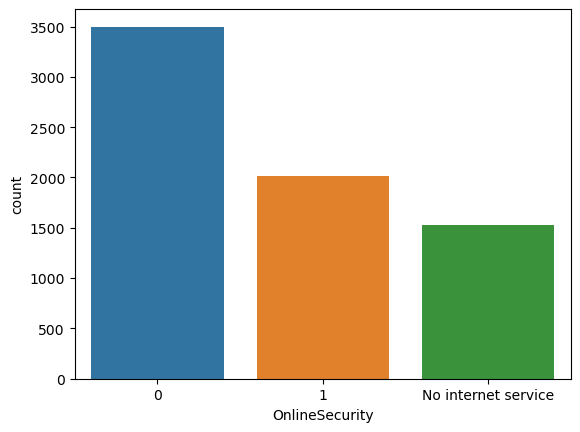

In [157]:
sns.countplot(x=customer_churn_dataset_3['OnlineSecurity'])

In [ ]:
# if they have no internet service we can put zero

In [ ]:
customer_churn_dataset_3['OnlineSecurity'].replace('No internet service', 0, inplace=True)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

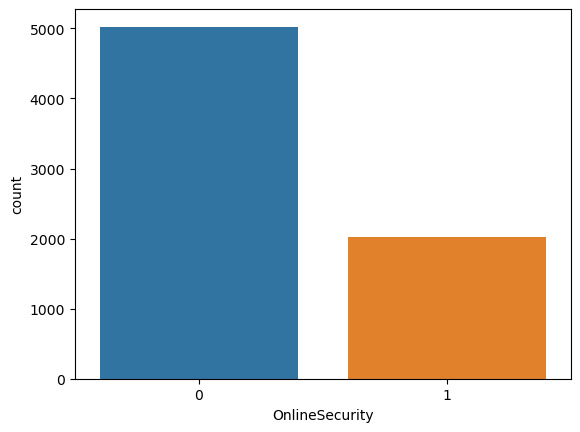

In [163]:
sns.countplot(x=customer_churn_dataset_3['OnlineSecurity'])

In [ ]:
# the imbalance might affect the accuracy of the model

In [165]:
customer_churn_dataset_3['OnlineBackup'].unique()

array([1, 0, 'No internet service'], dtype=object)

In [166]:
customer_churn_dataset_3['OnlineBackup'].value_counts()

0                      3088
1                      2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

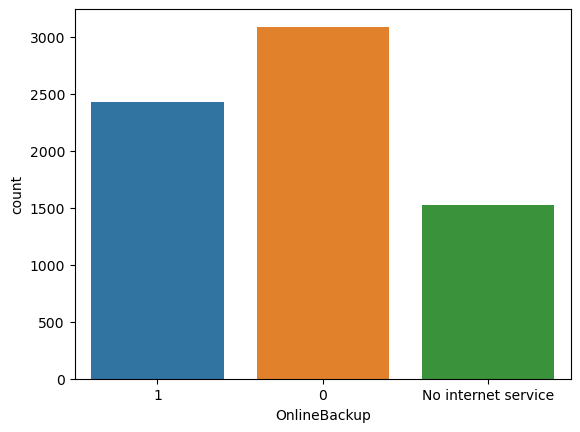

In [164]:
sns.countplot(x=customer_churn_dataset_3['OnlineBackup'])

In [167]:
customer_churn_dataset_3['OnlineBackup'].replace('No internet service', 0, inplace=True)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

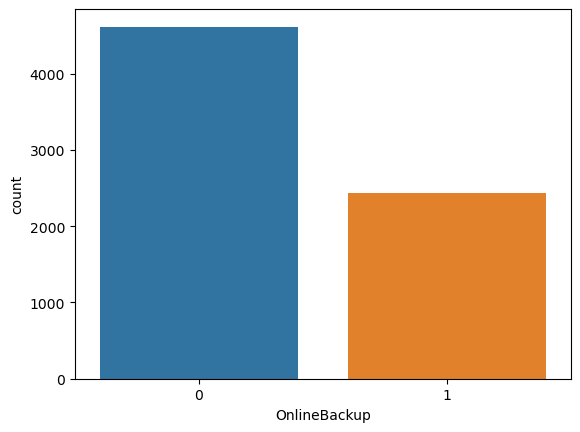

In [168]:
sns.countplot(x=customer_churn_dataset_3['OnlineBackup'])

In [170]:
customer_churn_dataset_3['DeviceProtection'].unique()

array([0, 1, 'No internet service'], dtype=object)

In [171]:
customer_churn_dataset_3['DeviceProtection'].value_counts()

0                      3095
1                      2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

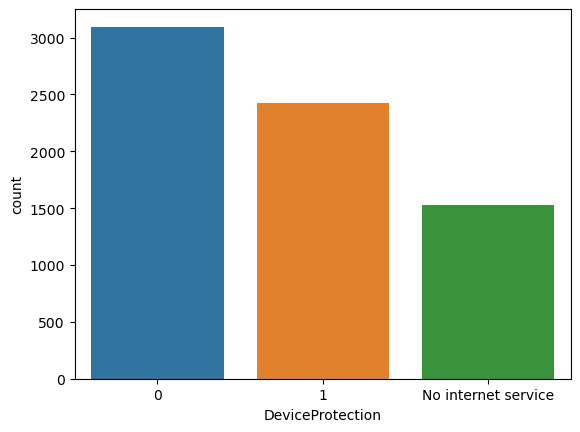

In [172]:
sns.countplot(x=customer_churn_dataset_3['DeviceProtection'])

In [173]:
customer_churn_dataset_3['DeviceProtection'].replace('No internet service', 0, inplace=True)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

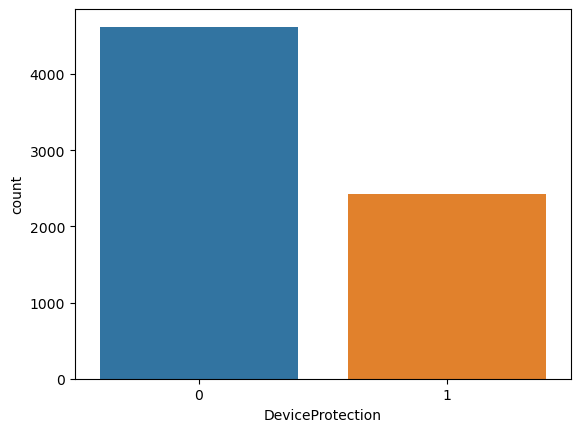

In [174]:
sns.countplot(x=customer_churn_dataset_3['DeviceProtection'])

In [206]:
customer_churn_dataset_4 = customer_churn_dataset_3.apply(pd.to_numeric, errors='coerce')

<AxesSubplot:>

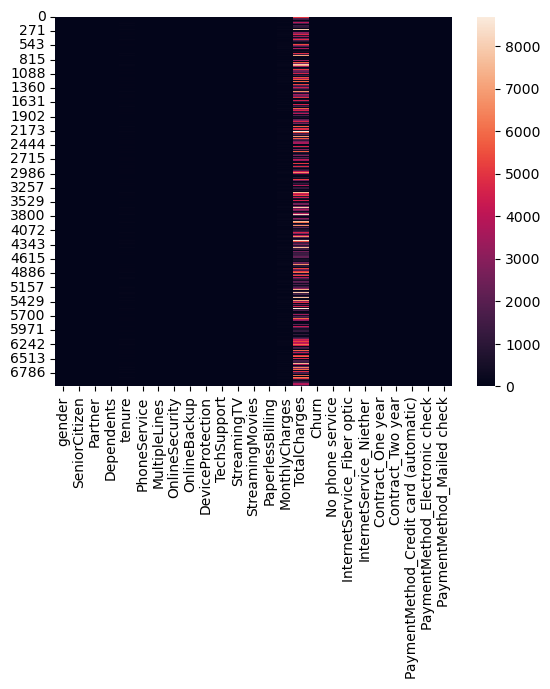

In [273]:
sns.heatmap(customer_churn_dataset_4)

In [209]:
customer_churn_dataset_4['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [272]:
customer_churn_dataset_4.replace([np.isfinite], 7000, inplace=True)

In [258]:
X = customer_churn_dataset_4.drop(labels='Churn', axis=1).values
y = customer_churn_dataset_4['Churn'].values

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [260]:
scaled_dataset = MinMaxScaler()
scaler = StandardScaler()

In [261]:
X_train = scaled_dataset.fit_transform(X_train)
X_test = scaled_dataset.transform(X_test)

In [262]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
logistic_model = LogisticRegression()

In [275]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [277]:
prediction_of_logistic_model = logistic_model.predict(X_test)

In [279]:
print(confusion_matrix(y_test,prediction_of_logistic_model))
print(classification_report(y_test,prediction_of_logistic_model))

[[1200  129]
 [ 197  232]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1329
         1.0       0.64      0.54      0.59       429

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.81      0.81      0.81      1758



In [285]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
# sigmoid because binarary classification
# sigmoid produces outputs values between 0 or 1
model.add(Dense(1, activation="sigmoid"))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [286]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [287]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [288]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test)
         ,callbacks=[early_stop])


Epoch 1/600
165/165 [==============================] - 1s 3ms/step - loss: 0.6343 - val_loss: 0.4563
Epoch 2/600
165/165 [==============================] - 0s 2ms/step - loss: 0.5412 - val_loss: 0.4472
Epoch 3/600
165/165 [==============================] - 0s 2ms/step - loss: 0.5022 - val_loss: 0.4392
Epoch 4/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4881 - val_loss: 0.4367
Epoch 5/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4773 - val_loss: 0.4337
Epoch 6/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4704 - val_loss: 0.4328
Epoch 7/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4659 - val_loss: 0.4306
Epoch 8/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4665 - val_loss: 0.4308
Epoch 9/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4584 - val_loss: 0.4281
Epoch 10/600
165/165 [==============================] - 0s 2ms/step - loss: 0.4578 - val_lo

<AxesSubplot:>

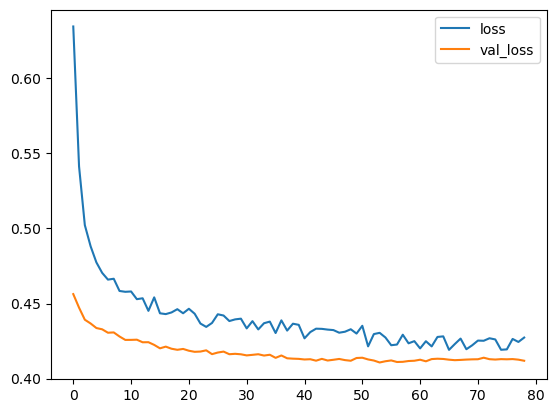

In [289]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [290]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

55/55 [==============================] - 0s 1ms/step


In [291]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1329
         1.0       0.65      0.49      0.56       429

    accuracy                           0.81      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758

[[1218  111]
 [ 220  209]]
